# Background
### Survey on English education in Japan by MEXT
MEXT (the Ministry of Education, Culture, Sports, Science and Technology in Japan) has been conducting surveys on English education in public elementary and secondary schools across Japan since 2013. 
However, their report is fairly simplistic, consisting mostly of basic visualizations of raw data and 'analysis' lacking sufficient theoretical validation. Those approaches appear to conveniently fit a predetermined scenario, thus aligning the conclusions with their policymaking objectives. 
Furthermore, there has not been sufficient effort to ensure falsifiability for the survey. While the data is publicly accessible on MEXT's website, it is available only in PDF format. When I contacted the responsible department to inquire about obtaining the data in CSV format for reanalysis, my request was ultimately denied on the grounds that reformatting the public data would be too time-consuming. Out of curiosity, I further inquired about the specific difficulties in extracting data that is already public but received no response.
- **Issue-1:** Simplistic analysis of the large scale, procedure-expensive data
- **Issue-2:** Low level data accessibility and reproducibility

### Scarce related studies 
Kadota (2023) discovered through reviews of academic databases like Google Scholar and CiNii Research that the survey data has seldom been reanalyzed or subjected to rigorous analytical techniques. This oversight may be partly due to what Terasawa (2021) suggests: a 'lack of expertise in rigorous scientific approaches among English education researchers.' Consequently, many studies assert the 'effect' of certain educational approaches without engaging in statistical analysis or providing a falsifiable discussion. Given the potential impact of MEXT’s survey on policy decisions affecting over 20,000 public elementary and secondary schools in Japan, it is deeply concerning that a decade has passed since the initial survey without substantial scientific critique.
- **Issue-3:** Practically no studies/critiques of the data by third parties

# Precursor studies
### My previous study (Kadota, 2023)
Given the situation, I (Kadota, 2023) **converted the PDF data into a CSV file and made it accessible on GitHub for other researchers and interested parties.** (https://github.com/Naomichi-K/EngEduSituation_Survey_2021-) I then analyzed the rate of students holding a certain level of CEFR certificate, which MEXT defines as an index of learning achievement, using binomial logistic regression model approaches. One remarkable finding from the analysis was that increased usage of English by teachers had a statistically significant negative impact on students' achievement in English learning.
- *Improvement-1&3:* Demonstrated a statistical approach to analyzing socio-level educational data on English education
- *Improvement-2:* Shared the data file and code for preprocessing on GitHub, ensuring falsifiability and reproducibility

### Limitations / Follow-up studies in 2024
In my previous study in 2023, I constructed a statistical model assuming that all predictors had a “linear” effect on the response, which seemed unlikely. Additionally, the counterintuitive conclusion that increased usage of English by teachers is unpreferable might have overemphasized data and overlooked efforts to derive conclusions that align with domain knowledge. 
- **Issue-4:** Failed to consider nonlinearity
- **Issue-5:** Counterintuitive and unexplainable conclusions

Therefore, in 2024, I initiated another project to address these issues. Firstly, I applied Generalized Additive Model (GAM) approaches and identified some nonlinear relationships between the features. Furthermore, I proposed an alternative index that might be more relevant than the one suggested by MEXT. In summary, I demonstrated the unreliability of using the rate of holding a specific certificate as an index of learning success. I also highlighted the benefits of analyzing the factors affecting students’ language activity duration in class through GAM methods and domain-knowledge-based discussions.
- *Improvement-4:* Identified nonlinear relationships between features, applying GAM approaches
- *Improvement-5:* Suggested another model, deriving implications that match domain knowledge

##### References
MEXT. (2022). Report on the 2022 Survey of English Education.
https://www.mext.go.jp/a_menu/kokusai/gaikokugo/1415043_00004.htm

Urano, K., Kudo, Y., Kusanagi, K., Sakai, H., Terasawa, T., and Watari, Y. (2021). The Evidence of English Education: For the Future Studies on English Education. Kenkyu-sha. P.32-33.

Kadota N. (2023). Exploration Evidence-Generating Approaches from the Survey of English Education; Regional Comparisons of English Achievement Indices through Binomial-Logistic Regression Analysis. (shared on the website of Ministry of Internal Affairs) 
https://www.nstac.go.jp/sys/files/sites/3/2023U5-shorei-03.pdf


# Remaining limitations to be addressed in this project
In my previous follow-up study, as I built the initial full model using a GAM, I selected features that seemed relevant based on my domain knowledge. While this decision can be justified to some extent, it could also be seen as arbitrary or biased. Therefore, I am now exploring the use of machine learning techniques during the feature selection phase of statistical modeling. More specifically, I plan to employ L1-norm and Elastic-Net regularization methods with the intent of building more accurate GAMs.
 - Issue-6: Possibly arbitrary feature selection
- Potential improvement-6: Regularizations (GAMs with a Lasso / Elastic-Net regularization)

# Analysis

In [117]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pygam import LinearGAM, s, f

In [118]:
# Load the CSV file
df = pd.read_csv("../dataset_folder/preprocessed_C_EngEdu.csv", encoding='shift_jis') # encoding for JP characters
# df = pd.read_csv("../dataset_folder/downsized_EngEdu.csv", encoding='cp932') # another encoding

print(df.shape)
print(df.head())

pd.set_option('display.precision', 3)
df.describe()

(47, 12)
  Prefecture  C_A1cefr.rate  C_CDgrasp  C_LA50  C_LA75  C_tE50  C_tE75   C_SW  \
0        北海道         -0.803      0.541   1.479  -0.409   0.967  -0.126  0.475   
1        青森県         -0.524     -0.692  -0.494  -0.937  -0.208  -1.583  0.122   
2        岩手県          0.064      1.051  -0.340   1.923  -0.313   0.348  0.717   
3        宮城県         -0.955      1.831  -0.785  -0.034  -0.987   0.208  0.301   
4        秋田県          0.062      0.020   2.070   0.226   2.899   0.374  0.556   

   C_ALT  C_ALTout  C_ICTpre  C_ICTrec  
0 -0.934     0.268     0.495    -0.393  
1 -0.964     0.178    -0.432    -0.934  
2 -0.519    -0.570    -0.650     0.069  
3  1.448     0.166    -0.564    -0.279  
4 -0.130     0.687    -0.450    -1.312  


,C_A1cefr.rate,C_CDgrasp,C_LA50,C_LA75,C_tE50,C_tE75,C_SW,C_ALT,C_ALTout,C_ICTpre,C_ICTrec
count,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01,4.700e+01
mean,4.255e-11,-4.255e-11,6.383e-11,-8.511e-11,4.255e-11,-4.255e-11,-2.128e-11,-2.128e-11,-2.128e-11,-4.255e-11,-4.724e-18
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-9.736e-01,-1.817e+00,-1.597e+00,-2.250e+00,-1.479e+00,-2.838e+00,-5.221e+00,-2.119e+00,-2.702e+00,-3.869e+00,-3.031e+00
25%,-5.328e-01,-7.783e-01,-7.756e-01,-6.695e-01,-6.516e-01,-5.313e-01,-1.621e-01,-7.730e-01,-6.395e-01,-4.051e-01,-4.004e-01
50%,-1.850e-01,-1.044e-01,-2.474e-01,2.747e-02,-2.076e-01,4.815e-02,2.942e-01,1.701e-02,1.777e-01,2.228e-02,-6.341e-02
75%,6.334e-02,7.164e-01,5.312e-01,6.110e-01,2.907e-01,6.742e-01,4.252e-01,7.084e-01,6.868e-01,5.303e-01,6.256e-01
max,5.147e+00,1.831e+00,2.162e+00,2.962e+00,2.899e+00,2.464e+00,8.047e-01,2.254e+00,1.994e+00,1.596e+00,1.959e+00


In [119]:
# Separate features and target
X = df.drop('C_LA75', axis=1)
y = df['C_LA75']

# Set "Prefecture" as the index of the DataFrame
X.set_index('Prefecture', inplace=True)
# y = df[['Prefecture','C_LA75']] # note; X can be either a matrix or a data frame, but y has to be a vector, not a df.
# y.set_index('Prefecture', inplace=True)

print(X.head())
print(y.head())

            C_A1cefr.rate  C_CDgrasp  C_LA50  C_tE50  C_tE75   C_SW  C_ALT  \
Prefecture                                                                   
北海道                -0.803      0.541   1.479   0.967  -0.126  0.475 -0.934   
青森県                -0.524     -0.692  -0.494  -0.208  -1.583  0.122 -0.964   
岩手県                 0.064      1.051  -0.340  -0.313   0.348  0.717 -0.519   
宮城県                -0.955      1.831  -0.785  -0.987   0.208  0.301  1.448   
秋田県                 0.062      0.020   2.070   2.899   0.374  0.556 -0.130   

            C_ALTout  C_ICTpre  C_ICTrec  
Prefecture                                
北海道            0.268     0.495    -0.393  
青森県            0.178    -0.432    -0.934  
岩手県           -0.570    -0.650     0.069  
宮城県            0.166    -0.564    -0.279  
秋田県            0.687    -0.450    -1.312  
0   -0.409
1   -0.937
2    1.923
3   -0.034
4    0.226
Name: C_LA75, dtype: float64


In [120]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# L1-norm feature selection

In [121]:
# Initialize Lasso model with a small alpha
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Display coefficients along with feature names
feature_names = X_train.columns
coefficients = lasso_model.coef_

# Print feature names with their corresponding coefficients
print("Feature coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


Feature coefficients:
C_A1cefr.rate: -0.0
C_CDgrasp: 0.041595262732589094
C_LA50: -0.015594388685940706
C_tE50: 0.0
C_tE75: 0.6446773239847494
C_SW: 0.0
C_ALT: 0.0
C_ALTout: 0.0
C_ICTpre: 0.2001720078082439
C_ICTrec: 0.03342294051550982


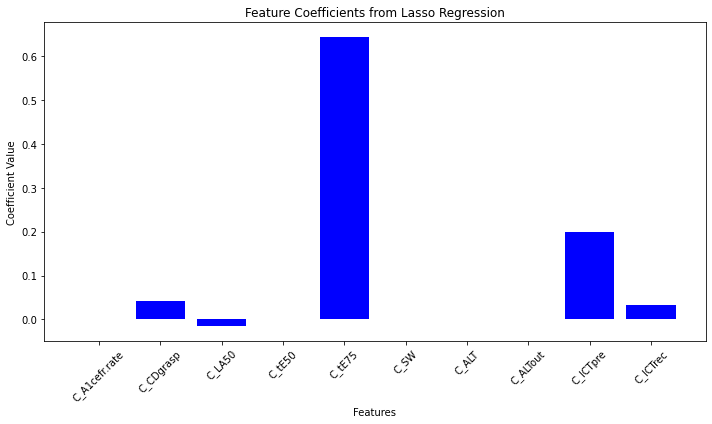

In [122]:
# Coefficients from the model
coefficients = lasso_model.coef_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients from Lasso Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# Optimize alpha
# Lasso with Cross-Validation
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lasso_cv.fit(X_train, y_train)

# Best alpha
print("Optimal alpha:", lasso_cv.alpha_)

# Get feature names from the DataFrame
feature_names = X_train.columns

# Coefficients with the best alpha
coefficients = lasso_cv.coef_
selected_features_count = 0
print("Coefficients with optimal alpha:")
for feature, coef in zip(feature_names, coefficients):
    status = "selected" if coef != 0 else "not selected"
    if coef != 0:
        selected_features_count += 1
    print(f"{feature}: {coef} ({status})")

# Display the number of selected features
print(f"Number of selected features: {selected_features_count}")

Optimal alpha: 0.024722313264171125
Coefficients with optimal alpha:
C_A1cefr.rate: 0.0 (not selected)
C_CDgrasp: 0.012666816562781182 (selected)
C_LA50: -0.0 (not selected)
C_tE50: 0.0 (not selected)
C_tE75: 0.6219715561156902 (selected)
C_SW: 0.0 (not selected)
C_ALT: 0.0 (not selected)
C_ALTout: 0.0 (not selected)
C_ICTpre: 0.17404117272407985 (selected)
C_ICTrec: 0.01865199072938563 (selected)
Number of selected features: 4


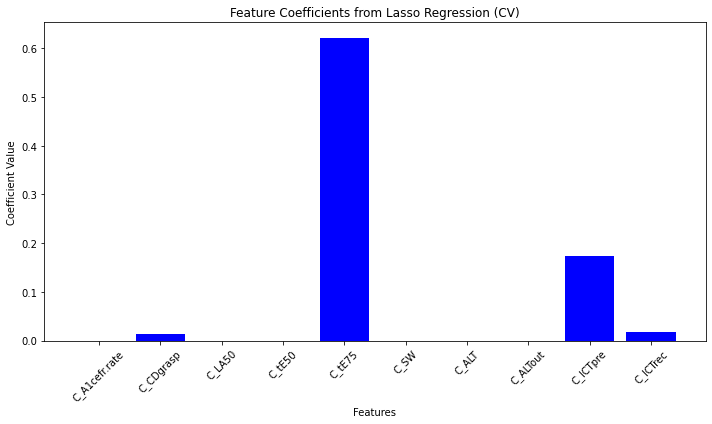

In [124]:
# Coefficients from the model
coefficients = lasso_cv.coef_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients from Lasso Regression (CV)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [130]:
# Making predictions on the test set
y_pred = lasso_cv.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

n = len(X_test) # Number of observations
p = selected_features_count + 1 # Number of independent variables in the model +1 (intercept)

# Calculate the Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Calculate AIC
y_pred = lasso_cv.predict(X_train) # Predict the response on the training data
rss = np.sum((y_train - y_pred) ** 2) # RSS
n = len(y_train) # Number of observations and predictors
p = np.sum(lasso_cv.coef_ != 0) + 1  # Including intercept

log_likelihood = -n/2 * np.log(rss/n) # Estimate log-likelihood
aic = 2 * p - 2 * log_likelihood # AIC
print(f"AIC: {aic}")

Mean Squared Error: 0.4124462987800174
R-squared: 0.31802889596532824
Adjusted R-squared: -0.909519091297081
AIC: -23.757593852394926


Adjusted R-squared has become a negative value!
However, given that I am currently using the Lasso regularazation approach for feature selection, it might not be meaningfull to check the model performance indeces now. I'll check them at the last step.

# Elastic-Net feature selection

In [131]:
# Initialize ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # alpha controls the overall strength of the penalty,
elastic_net.fit(X_train, y_train)                 # l1_ratio controls the balance between L1 and L2

# Display coefficients along with feature names
feature_names = X_train.columns
coefficients = elastic_net.coef_

# Print feature names with their corresponding coefficients
print("Feature coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


Feature coefficients:
C_A1cefr.rate: -0.0
C_CDgrasp: 0.12984690053239942
C_LA50: -0.13149121281998954
C_tE50: 0.03617956787201678
C_tE75: 0.6286111104092623
C_SW: 0.0
C_ALT: 0.0
C_ALTout: 0.01146293007056885
C_ICTpre: 0.19140874145620568
C_ICTrec: 0.09248381710615618


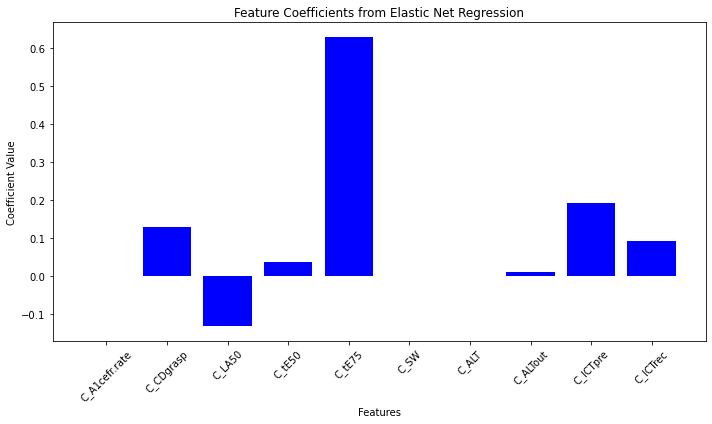

In [132]:
# Coefficients from the model
coefficients = elastic_net.coef_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients from Elastic Net Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
# Setting up the ElasticNetCV model
elastic_net_cv = ElasticNetCV(alphas=None, cv=5, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], max_iter=10000)

# Fitting the model
elastic_net_cv.fit(X_train, y_train)

# Best parameters
print(f"Optimal alpha: {elastic_net_cv.alpha_}")
print(f"Optimal l1_ratio: {elastic_net_cv.l1_ratio_}")

# Coefficients with the best parameters from Elastic Net
feature_names = X_train.columns  # Retrieve feature names from X_train DataFrame
coefficients = elastic_net_cv.coef_
selected_features_count = 0
print("Coefficients with optimal alpha:")
for feature, coef in zip(feature_names, coefficients):
    status = "selected" if coef != 0 else "not selected"
    if coef != 0:
        selected_features_count += 1
    print(f"{feature}: {coef} ({status})")

# Display the number of selected features
print(f"Number of selected features: {selected_features_count}")

Optimal alpha: 0.05569171303067866
Optimal l1_ratio: 0.7
Coefficients with optimal alpha:
C_A1cefr.rate: -0.015568499946110472 (selected)
C_CDgrasp: 0.13499869355673608 (selected)
C_LA50: -0.19982818353562373 (selected)
C_tE50: 0.09197153143874183 (selected)
C_tE75: 0.6685276875128463 (selected)
C_SW: 0.0 (not selected)
C_ALT: 0.0 (not selected)
C_ALTout: 0.003915309994521407 (selected)
C_ICTpre: 0.18916490393581104 (selected)
C_ICTrec: 0.09533499410973433 (selected)
Number of selected features: 8


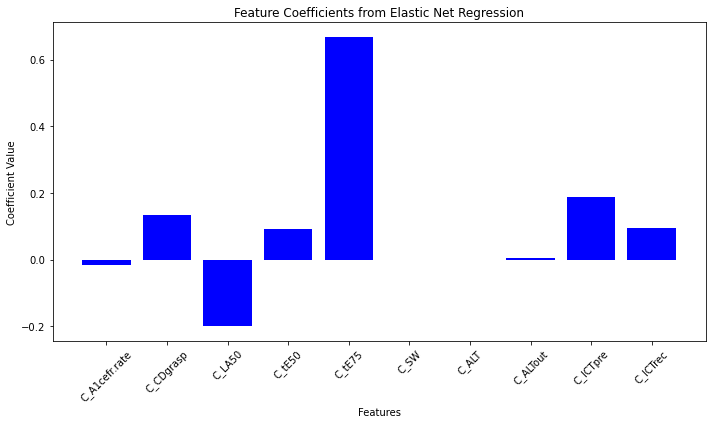

In [134]:
# Coefficients from the model
coefficients = elastic_net_cv.coef_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients from Elastic Net Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The automatic process selected 8 predictors; however, the coefficients of some features, such as C_A1.cefr.rate and C_ICTrec, are quite small. Therefore, you might consider truncating them in practical analysis.

In [ ]:
# Making predictions on the test set
y_pred = elastic_net_cv.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

n = len(X_test) # Number of observations
p = selected_features_count + 1 # Number of independent variables in the model +1 (intercept)

# Calculate the Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Calculate AIC
y_pred = elastic_net_cv.predict(X_train) # Predict the response on the training data
rss = np.sum((y_train - y_pred) ** 2) # RSS
n = len(y_train) # Number of observations and predictors
p = np.sum(lasso_cv.coef_ != 0) + 1  # Including intercept

log_likelihood = -n/2 * np.log(rss/n) # Estimate log-likelihood
aic = 2 * p - 2 * log_likelihood # AIC
print(f"AIC: {aic}")


As mentioned above, considering the model performance at this stage does not seem meaningfull. However, I just calculated them for now.

# GAM modeling
Through the analysis above, I chose to add the feature "C_ICTpre" into my previous GAM for this project. I was originally going to perform GAM by using the library pyGAM in this notebook, but the environment crashed once I tried earlier. So, for safety, I just paste the result I conducted in R. The feature 'ICTpre' was ultimately included in the model linearly. In my previous survey, I analyzed four GAMs, from Model_1 to Model_4. This time, I newly built Model_5. Its summary and comparisons, in terms of Adjusted R-squared and Deviance Explained, are shown below.

<div style="display:flex;">
    <img src="RGAM_summary.png" style="width:400px; height:300px;">
    <img src="Rplot_RGAM_adjR2.jpeg" style="width:400px; height:300px;">
    <img src="Rplot_RGAM_DevExp.jpeg" style="width:400px; height:300px;">
</div>


Previously, I chose Model_3 as the best model considering the two model performance indeces. However, compared to that, our new model displayed the best Adjusted R-squared. On the other hand, Deviance Explained was not the best.
Model selection is not a simple process and requires more dedicated discussion from here. Nevertheless, it was intriguing to note that Adjusted R-squared showed some improvement.